# Deep Learning MNIST Dataset Example

## Step 1: Import needed libraries

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

Using TensorFlow backend.
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/bp/anaconda/lib/python3.6/site-packages/tensorflow/python/fra

## Step 2: Get the data and plot train & test

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from sklearn.model_selection import train_test_split
x_train, ignore, y_train, ignore2 = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

In [3]:
print(x_train.shape)

(12000, 28, 28)


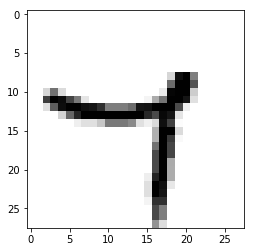

In [4]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[0])

7


In [6]:
plt.imshow(x_test[3], cmap=plt.cm.binary)

In [7]:
print(y_test[3])

0


## Step 3: Reshape the dataset to structure that can be an input to NN, if CNN then we can keep it the way it is

In [8]:
x_train = x_train.reshape(12000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

12000 train samples
10000 test samples


In [9]:
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Step 4: Build a 2 layer model with dropout

In [10]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Step 5: Start training the model

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [13]:
batch_size = 128
num_classes = 10
epochs = 20

In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,validation_data=(x_test, y_test))

Train on 12000 samples, validate on 10000 samples
Epoch 1/20
12000/12000 [==============================] - 0s 26us/step - loss: 0.0334 - accuracy: 0.9882 - val_loss: 0.1589 - val_accuracy: 0.9623
Epoch 2/20
12000/12000 [==============================] - 0s 28us/step - loss: 0.0311 - accuracy: 0.9894 - val_loss: 0.1522 - val_accuracy: 0.9649
Epoch 3/20
12000/12000 [==============================] - 0s 29us/step - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.1690 - val_accuracy: 0.9615
Epoch 4/20
12000/12000 [==============================] - 0s 34us/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.1699 - val_accuracy: 0.9613
Epoch 5/20
12000/12000 [==============================] - 0s 33us/step - loss: 0.0269 - accuracy: 0.9905 - val_loss: 0.1687 - val_accuracy: 0.9632
Epoch 6/20
12000/12000 [==============================] - 0s 34us/step - loss: 0.0224 - accuracy: 0.9920 - val_loss: 0.1626 - val_accuracy: 0.9674
Epoch 7/20
12000/12000 [==============================] - 0s 34us/st

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19723354203983598
Test accuracy: 0.9661999940872192


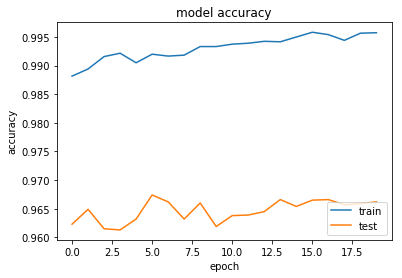

In [19]:
plt.clf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

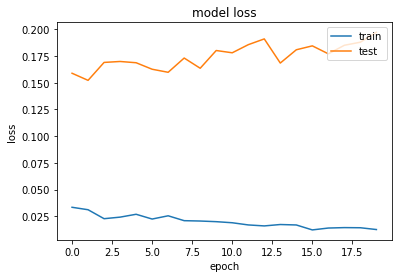

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## CNN

In [21]:
batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, ignore, y_train, ignore2 = train_test_split(x_train, y_train, test_size=0.8, random_state=42)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (12000, 28, 28, 1)
12000 train samples
10000 test samples


In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [24]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 12000 samples, validate on 10000 samples
Epoch 1/3
12000/12000 [==============================] - 22s 2ms/step - loss: 0.6588 - accuracy: 0.7903 - val_loss: 0.1721 - val_accuracy: 0.9486
Epoch 2/3
12000/12000 [==============================] - 23s 2ms/step - loss: 0.2061 - accuracy: 0.9374 - val_loss: 0.1057 - val_accuracy: 0.9675
Epoch 3/3
12000/12000 [==============================] - 23s 2ms/step - loss: 0.1492 - accuracy: 0.9542 - val_loss: 0.0888 - val_accuracy: 0.9723


In [26]:
from keras import models
#if loaded_model:
#    model = loaded_model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) 

Test loss: 0.08880068471450359
Test accuracy: 0.9722999930381775


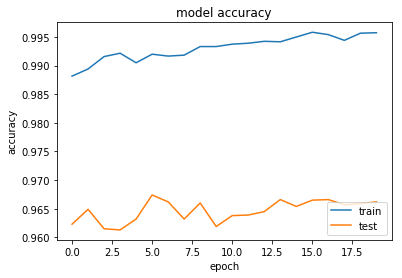

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

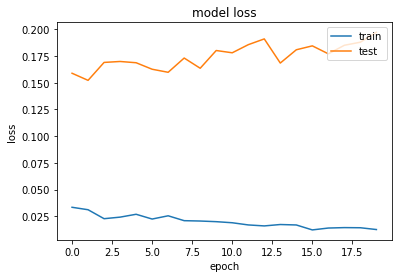

In [28]:
plt.clf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
 # serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))